# **Pràctica 1: Regressió**

# Apartat (C): Analitzant les dades

L'objectiu d'aquest primer apartat és conèixer la base de dades amb la que treballarem. Anaitzarem els diferents atributs que la composen, els entendrem i, si no està estipulat, fixarrem quin es l'atribut objectiu a predir de tots els que hi ha a la base de dades.

In [1]:
# importem alguens llibreries que necessitarem.
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.offsetbox import AnchoredText
import scipy.stats
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
import warnings
warnings.filterwarnings("ignore")

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Carreguem els nostres datasets
days_dataset = pd.read_csv('day.csv', header=0)
hours_dataset = pd.read_csv('hour.csv', header=0)

Observem les primeres mostres de la nostra base de dades:

In [3]:
print('5 primeres mostres de days_dataset:')
days_dataset.head()

5 primeres mostres de days_dataset:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600


In [4]:
print('5 primeres mostres de hours_dataset:')
hours_dataset.head()

5 primeres mostres de hours_dataset:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240,0.288,0.810,0.000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220,0.273,0.800,0.000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220,0.273,0.800,0.000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240,0.288,0.750,0.000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240,0.288,0.750,0.000,0,1,1


Podríem ja suposar que el nombre d'usuaris registrats no varia gaire ni amb el temps ni amb el mes de l'any, però si amb els dies laborables i festius. En canvi els usuaris casuals, probablement siguin turistes o habitants que utilitzen les bicicletes per passejar, no per anar a treballar, llavors un bon clima i si és un dia de festa afectarà positivament a aquests usuaris.

Si suposem certes les assumpcions anteriors, llavors les hores on tindrem més usuaris entre setmana seran les d'abans d'anar a treballar (de 7 a 9) i les de la sortida de la feina, tot i que aquestes estan més distribuides, podria començar a les 16 i acabar a les 20. Per altra banda, els caps de setmana trobarem usuaris esporàdics que no creiem que iniciin la passejada abans de les 10 ni que s'estiguin fins més de les 18, així que no esperem un pic clar a cap hora d'un festiu.

Ara veurem estadístiques dels atributs numèrics de les bases de dades:

In [5]:
print("Estadístiques dels atributs numèrics de days_dataset:")
days_dataset.describe() 

Estadístiques dels atributs numèrics de days_dataset:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000
mean,366.000,2.497,0.501,6.520,0.029,2.997,0.684,1.395,0.495,0.474,0.628,0.190,848.176,3656.172,4504.349
std,211.166,1.111,0.500,3.452,0.167,2.005,0.465,0.545,0.183,0.163,0.142,0.077,686.622,1560.256,1937.211
min,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.059,0.079,0.000,0.022,2.000,20.000,22.000
25%,183.500,2.000,0.000,4.000,0.000,1.000,0.000,1.000,0.337,0.338,0.520,0.135,315.500,2497.000,3152.000
50%,366.000,3.000,1.000,7.000,0.000,3.000,1.000,1.000,0.498,0.487,0.627,0.181,713.000,3662.000,4548.000
75%,548.500,3.000,1.000,10.000,0.000,5.000,1.000,2.000,0.655,0.609,0.730,0.233,1096.000,4776.500,5956.000
max,731.000,4.000,1.000,12.000,1.000,6.000,1.000,3.000,0.862,0.841,0.973,0.507,3410.000,6946.000,8714.000


In [6]:
print("Estadístiques dels atributs numèrics de hours_dataset:")
hours_dataset.describe()

Estadístiques dels atributs numèrics de hours_dataset:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000
mean,8690.000,2.502,0.503,6.538,11.547,0.029,3.004,0.683,1.425,0.497,0.476,0.627,0.190,35.676,153.787,189.463
std,5017.029,1.107,0.500,3.439,6.914,0.167,2.006,0.465,0.639,0.193,0.172,0.193,0.122,49.305,151.357,181.388
min,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.020,0.000,0.000,0.000,0.000,0.000,1.000
25%,4345.500,2.000,0.000,4.000,6.000,0.000,1.000,0.000,1.000,0.340,0.333,0.480,0.104,4.000,34.000,40.000
50%,8690.000,3.000,1.000,7.000,12.000,0.000,3.000,1.000,1.000,0.500,0.485,0.630,0.194,17.000,115.000,142.000
75%,13034.500,3.000,1.000,10.000,18.000,0.000,5.000,1.000,2.000,0.660,0.621,0.780,0.254,48.000,220.000,281.000
max,17379.000,4.000,1.000,12.000,23.000,1.000,6.000,1.000,4.000,1.000,1.000,1.000,0.851,367.000,886.000,977.000



Cap atribut té un mínim inferior a 0, això està molt bé ja que en ocasions podria trencar el model.

Algunes bases de dades tenen valors no existents. Numpy els representa amb ``np.nan``. Per treure'ls es pot utilitzar ``dades[np.isnan(dades)] = valor``. El ``valor`` d'aquest pot ser 0, la mitja, la mediana, ... i es pot mirar com afecten diferents estratègies. A més, també podem mirar si hi ha algun atribut perdut, és a dir, que té molts valors no existents i valorar si eliminar directament l'atribut.

Primer de tot comptarem el nombre de valors no existents per atribut:

In [7]:
print('Valors no existents days.csv:')
print(days_dataset.isnull().sum(),'\n')

Valors no existents days.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 



In [8]:
print('Valors no existents hours.csv:')
print(hours_dataset.isnull().sum())

Valors no existents hours.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Sembla que en el nostre dataset no trobem cap valor no existent, per tant no hem de fer res.

#### **Estudi i neteja d'atributs no utilitzats**

Creiem que pot ser interessant predir ``cnt`` , el nombre total de bicicletes llogades, a partir de la resta d'atributs. Ara bé, ``casual`` i ``registered`` son atributs que no se saben a priori (de fet, son bons candidats a targets, per exemple intentar predir ``casual`` a partir del temps que fa sembla força interessant), llavors no tindria sentit intentar trobar un model per ``cnt`` utilitzant aquests dos, de manera que no els considerarem. Per altra banda, per no tenir problemes amb el tipus de les dades, farem servir ``instant`` en comptes de ``dteday`` per representar el pas dels dies en ``days_dataset``. 

In [9]:
del_columns = ['casual', 'registered', 'dteday']
days_dataset = days_dataset.drop(columns=del_columns, errors='ignore')
hours_dataset = hours_dataset.drop(columns=del_columns, errors='ignore')

Del dataset de les hores creiem que el que és important és observar a quines hores hi ha els pics de bicis llogades.

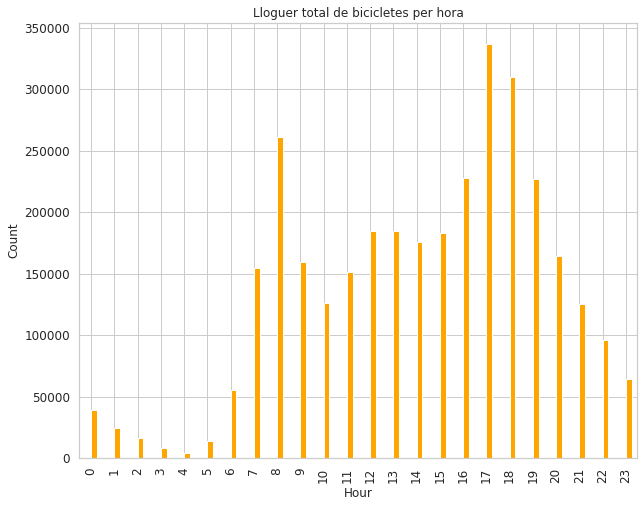

In [10]:
ax = hours_dataset[['hr','cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(10, 8),
        legend = False, title ="Lloguer total de bicicletes per hora", 
        color='orange', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()

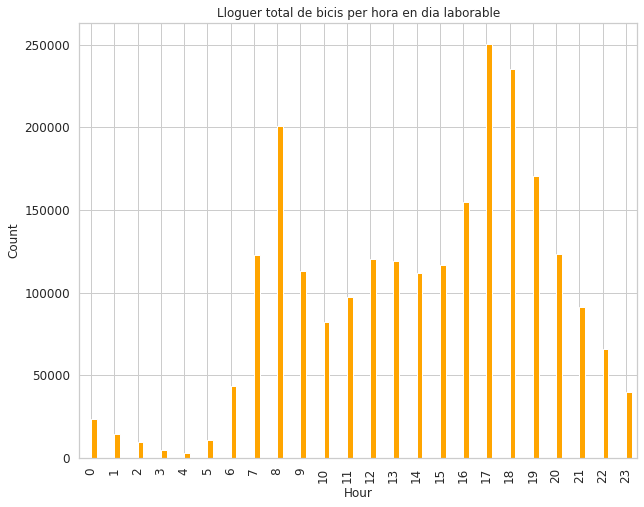

In [11]:
hours_workday = hours_dataset[hours_dataset['weekday'] < 5]
ax = hours_workday[['hr','cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(10, 8),
        legend = False, title ="Lloguer total de bicis per hora en dia laborable", 
        color='orange', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()

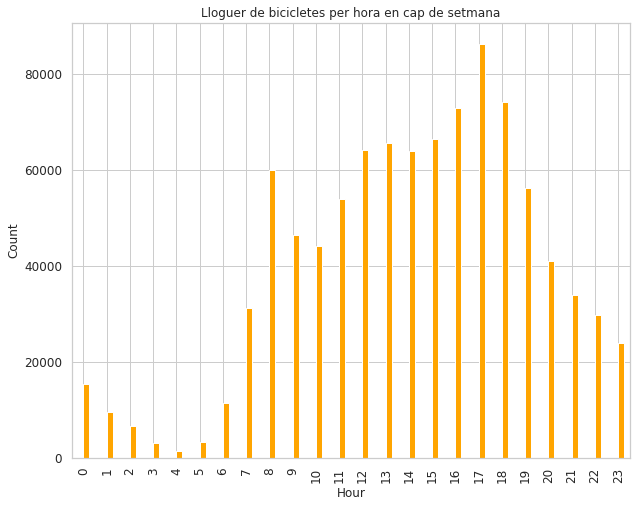

In [12]:
hours_weekend = hours_dataset[hours_dataset['weekday'] > 4]
ax = hours_weekend[['hr','cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(10, 8),
        legend = False, title ="Lloguer de bicicletes per hora en cap de setmana", 
        color='orange', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()

La diferència més notable entre els dies laborables i els festius no és pas la distribució, si no la quantitat. El pic en dia laborable és força més alt que el del dia festiu, fins i tot si tenim en compte que de dies festius només n'hi ha dos i de laborables 5 ($250000 \times \frac{7}{5}$ és força més gran que $85000 \times \frac{7}{2}$). Les suposicions que havíem formulat es compleixen parcialment: els pics de les 8 i 17 els havíem predit, però pensàvem que seria més alt el de les 8. Potser al matí agafen transport públic per arribar ràpidament a la feina però a la tarda es prenen amb calma la tornada a casa. 

És clar que els usuaris les utilitzen per anar a treballar quan trobem pics a les 8 i 17, així que sorprèn que els caps de setmana es mantingui aquest patró. Ara bé, com que les diferències entre els pics i les valls no son tan exagerades com els dies laborables, podem intuir que el gruix dels usuaris les utilitzen per passejar. 

Veurem ara en quines temporades i condicions meteorològiques tenen més lloguers:

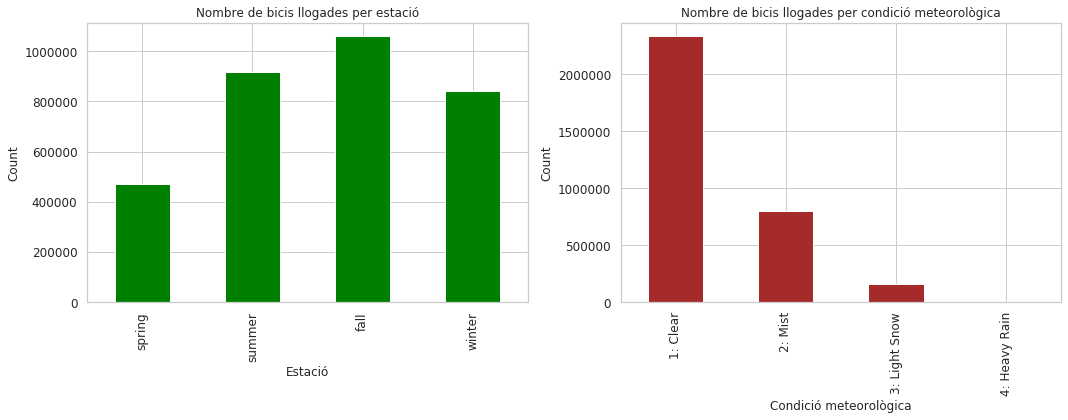

In [13]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax1 = hours_dataset[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
        legend = False, title ="Nombre de bicis llogades per estació", 
        stacked=True, color = 'green', fontsize=12, ax=ax1)
ax1.set_xlabel("Estació", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','summer','fall','winter'])

 
ax2 = hours_dataset[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
        legend = False, stacked=True, title ="Nombre de bicis llogades per condició meteorològica", 
        color = 'brown', fontsize=12, ax=ax2)
ax2.set_xlabel("Condició meteorològica", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()

Aquests gràfics mostren que la tardor és la estacio on més gent lloga bicicletes, i que la condició meteorològica preferida per llogar és un temps clar.

És curiós que la primavera tingui una distribució tan baixa en comparació amb les altres estacions, però això pot ser degut a que a la primavera a Washington és quan plou més dies (tot i que no és l'estació amb més volum de precipitcions) tal com es pot veure a https://en.wikipedia.org/wiki/Washington,_D.C.#Climate

Provem a veure quin percentatge de dies de primavera tenim clima clear, per saber si son menys de la mitja i llavors concordi amb la informació de wikipedia.

In [14]:
print("Percentatge de dies amb clima clear a la primavera: ", (hours_dataset[hours_dataset['weathersit'] == 1]['season'] == 1).sum() / (hours_dataset.shape[0]/4))

Percentatge de dies amb clima clear a la primavera:  0.6133839691581794


In [15]:
print("Percentatge de dies amb clima clear: ", (hours_dataset['weathersit'] == 1).sum() / (hours_dataset.shape[0]))

Percentatge de dies amb clima clear:  0.656712123827608


No es gaire més baix, però ho és. A més, creiem que com no hi ha cap terme mig de pluja entre clear i heavy_rain, alguna pluja no molt intensa ha d'haver estat classificada com a clear, però haguès tanmateix evitat que tants usuaris lloguessin una bicicleta.

A partir d'ara utilitzarem ``days_dataset`` per tal d'acotar el problema de regressió i així poder estudiar aquest cas en més profunditat i (esperem) tenir millors resultats.

#### **Visualitzacions de les relacions entre atributs**

Creiem que pot ser interessant visualitzar la distribució entre algunes variables per entendre millor les dades que estem tractant.

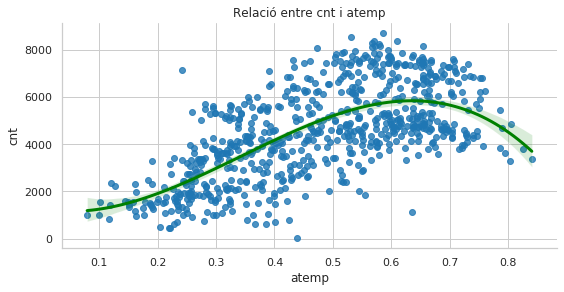

In [16]:
#Visualization of the relations between atemp and cnt

sns.lmplot("atemp", "cnt", days_dataset, order = 3, size = 4, aspect = 2, line_kws={'color': 'green'})
plt.title("Relació entre cnt i atemp")
#plt.savefig('Imatges/cnt_func_atemp.png', dpi=300, bbox_inches='tight')
plt.show()

Observem que quan la sensació tèrmica augmenta, el número de bicis llogades va augmentant fins a cert punt on comença a disminuir. Podem deduir que amb temperatures baixes o molt elevades tindrem menys bicis llogades.

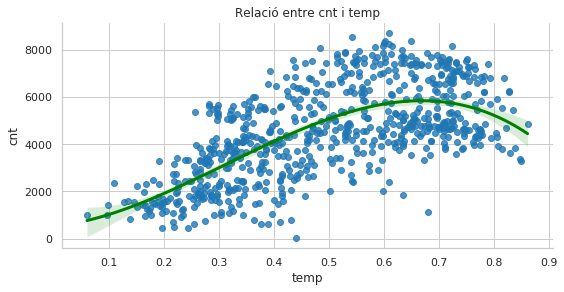

In [17]:
#Visualization of the relations between temp and cnt

sns.lmplot("temp", "cnt", days_dataset, order = 3, height = 4, aspect = 2, line_kws={'color': 'green'})
plt.title("Relació entre cnt i temp")
#plt.savefig('Imatges/cnt_func_temp.png', dpi=300, bbox_inches='tight')
plt.show()

Es molt semblant a la de la sensacío tèrmica ja que la temperatura i aquesta estan relacionades.
Si creesim un model per aquests podríem esperar trobar-nos una recta amb pendent positiu.
També esperem per tant una correlació positiva i alta. Comprovem-ho.

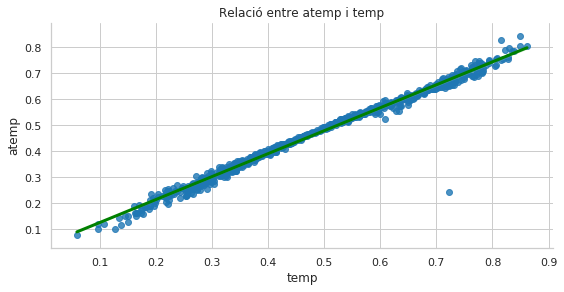

In [18]:
sns.lmplot("temp", "atemp", days_dataset, height = 4, aspect = 2, line_kws={'color': 'green'})
plt.title("Relació entre atemp i temp")
#plt.savefig('Imatges/temp_func_atemp.png', dpi=300, bbox_inches='tight')
plt.show()

Ara visualitzarem 'instant' a days_dataset.

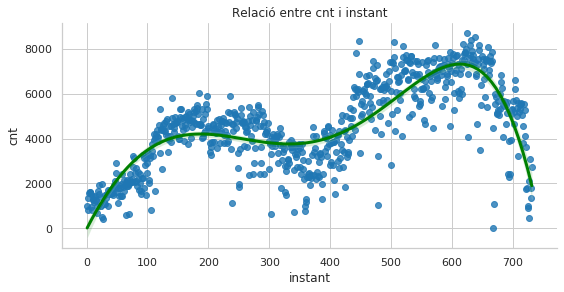

In [19]:
#Visualization of the relations between instant and cnt

sns.lmplot("instant", "cnt", days_dataset, order = 5, height = 4, aspect = 2, line_kws={'color': 'green'})
plt.title("Relació entre cnt i instant")
#plt.savefig('Imatges/cnt_func_instant.png', dpi=300, bbox_inches='tight')
plt.show()

Podem observar que hi ha certa repetició a partir de l'instant 360, això és degut a que acaba l'any i les condicions haurien de ser semblants a l'inici. Veiem que el segon cicle es troba una mica més amunt, això indica que l'empresa té més usuaris que l'any anterior, per tant van per bon camí.

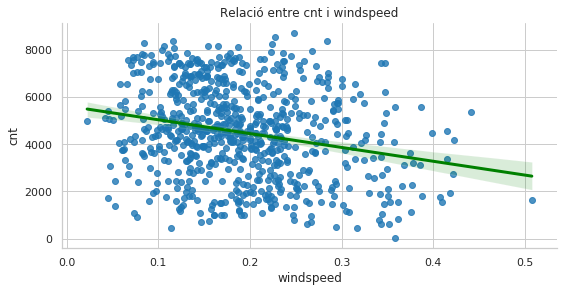

In [20]:
#Visualization of the relations between windspeed and cnt

sns.lmplot("windspeed", "cnt", days_dataset, order = 1, height = 4, aspect = 2, line_kws={'color': 'green'})
plt.title("Relació entre cnt i windspeed")
#plt.savefig('Imatges/cnt_func_windspeed.png', dpi=300, bbox_inches='tight')
plt.show()

Aquí tenim una correlació negativa entre les dues variables, quan puja la velocitat del vent, baixa la quantitat d'usuaris del servei de lloguer de bicicletes.

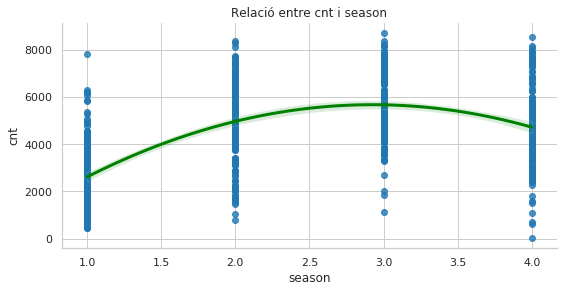

In [21]:
#Visualization of the relations between season and cnt

sns.lmplot("season", "cnt", days_dataset, order = 2, height = 4, aspect = 2, line_kws={'color': 'green'})
plt.title("Relació entre cnt i season")
#plt.savefig('Imatges/cnt_func_season.png', dpi=300, bbox_inches='tight')
plt.show()

És més difícil veure les correlacions amb les dades discretes, però creiem que és prou clara aquesta relació per mostrar-la. Això mostra que l'estació (degut probablement a la temperatura, pluja,... associades a cadascuna) influencia la quantitat de bicicletes llogades.

El següent gràfic és un histograma de l'atribut 'cnt' per ``days_dataset``:

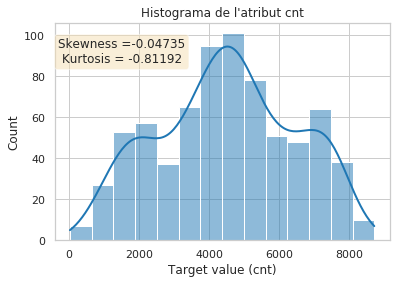

Skewness:  -0.04735278011900183
Kurtosis:  -0.8119223847191548


In [22]:
plt.figure()
plt.title("Histograma de l'atribut cnt")
plt.xlabel("Target value (cnt)")
plt.ylabel("Count")

skewness = days_dataset['cnt'].skew()
kurtosis = days_dataset['cnt'].kurt()

textstr = "Skewness ={:.5f}\nKurtosis = {:.5f}".format(skewness, kurtosis)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

distplot = sns.histplot(days_dataset['cnt'], kde=True)
distplot.annotate(textstr,xy=(1500,85),horizontalalignment='center', verticalalignment='bottom',bbox=props)
#plt.savefig('Imatges/cnt_histogram.png', dpi=300, bbox_inches='tight')
plt.show()
print("Skewness: ", skewness)
print("Kurtosis: ", kurtosis)

Sembla aproximadament una distribució gaussiana, tot i que els valors de skewness i kurtosis ens indiquen que té més outliers cap a l'esquerra i que està una mica més aplastada del normal. Ara bé, com que no passa de 1 (o -1) no hauria de preocupar-nos.

Veiem ara un mapa que mostra les correlacions entre tots els atributs per comprovar si el que acabem de descriure té sentit.

Text(0.5, 1, 'Matriu de correlació')

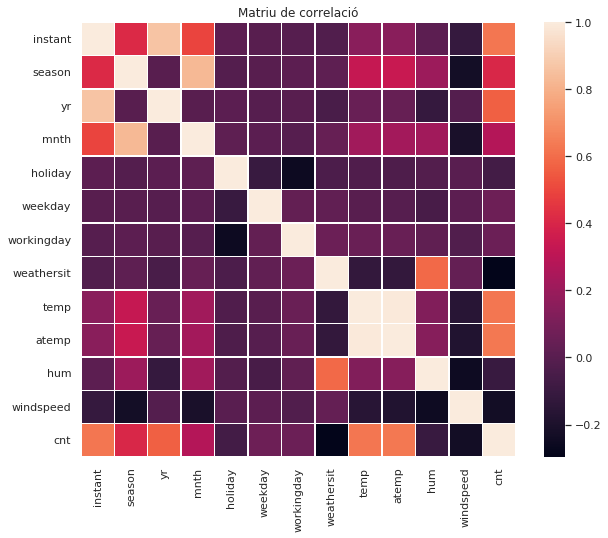

In [23]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = days_dataset.corr()

plt.figure(figsize = (10,8))

ax = sns.heatmap(correlacio, square=True, linewidths=0.5)
plt.title("Matriu de correlació")
#plt.savefig('Imatges/mat_correlacio.png', dpi=300, bbox_inches='tight')

In [24]:
correlacio['temp'][abs(correlacio['temp']).argsort()]

weekday      -0.000
holiday      -0.029
yr            0.048
workingday    0.053
weathersit   -0.121
hum           0.127
instant       0.151
windspeed    -0.158
mnth          0.220
season        0.334
cnt           0.627
atemp         0.992
temp          1.000
Name: temp, dtype: float64

Com hem suposat abans ``temp`` i ``atemp`` tenen una correlació molt alta, gairebé 1. Així que un dels dos el podríem eliminar, per exemple ``temp``, ja que té una correlació més baixa amb ``cnt``.

Eliminant l'atribut ``yr`` i aplicant mòdul 366 a ``instant`` agrupem els dos anys de dades en un.

In [25]:
del_columns = ['temp']
days_dataset = days_dataset.drop(columns=del_columns, errors='ignore')

També podem utilitzar la funció pairplot per tal de veure els atributs que estan relacionats entre si.

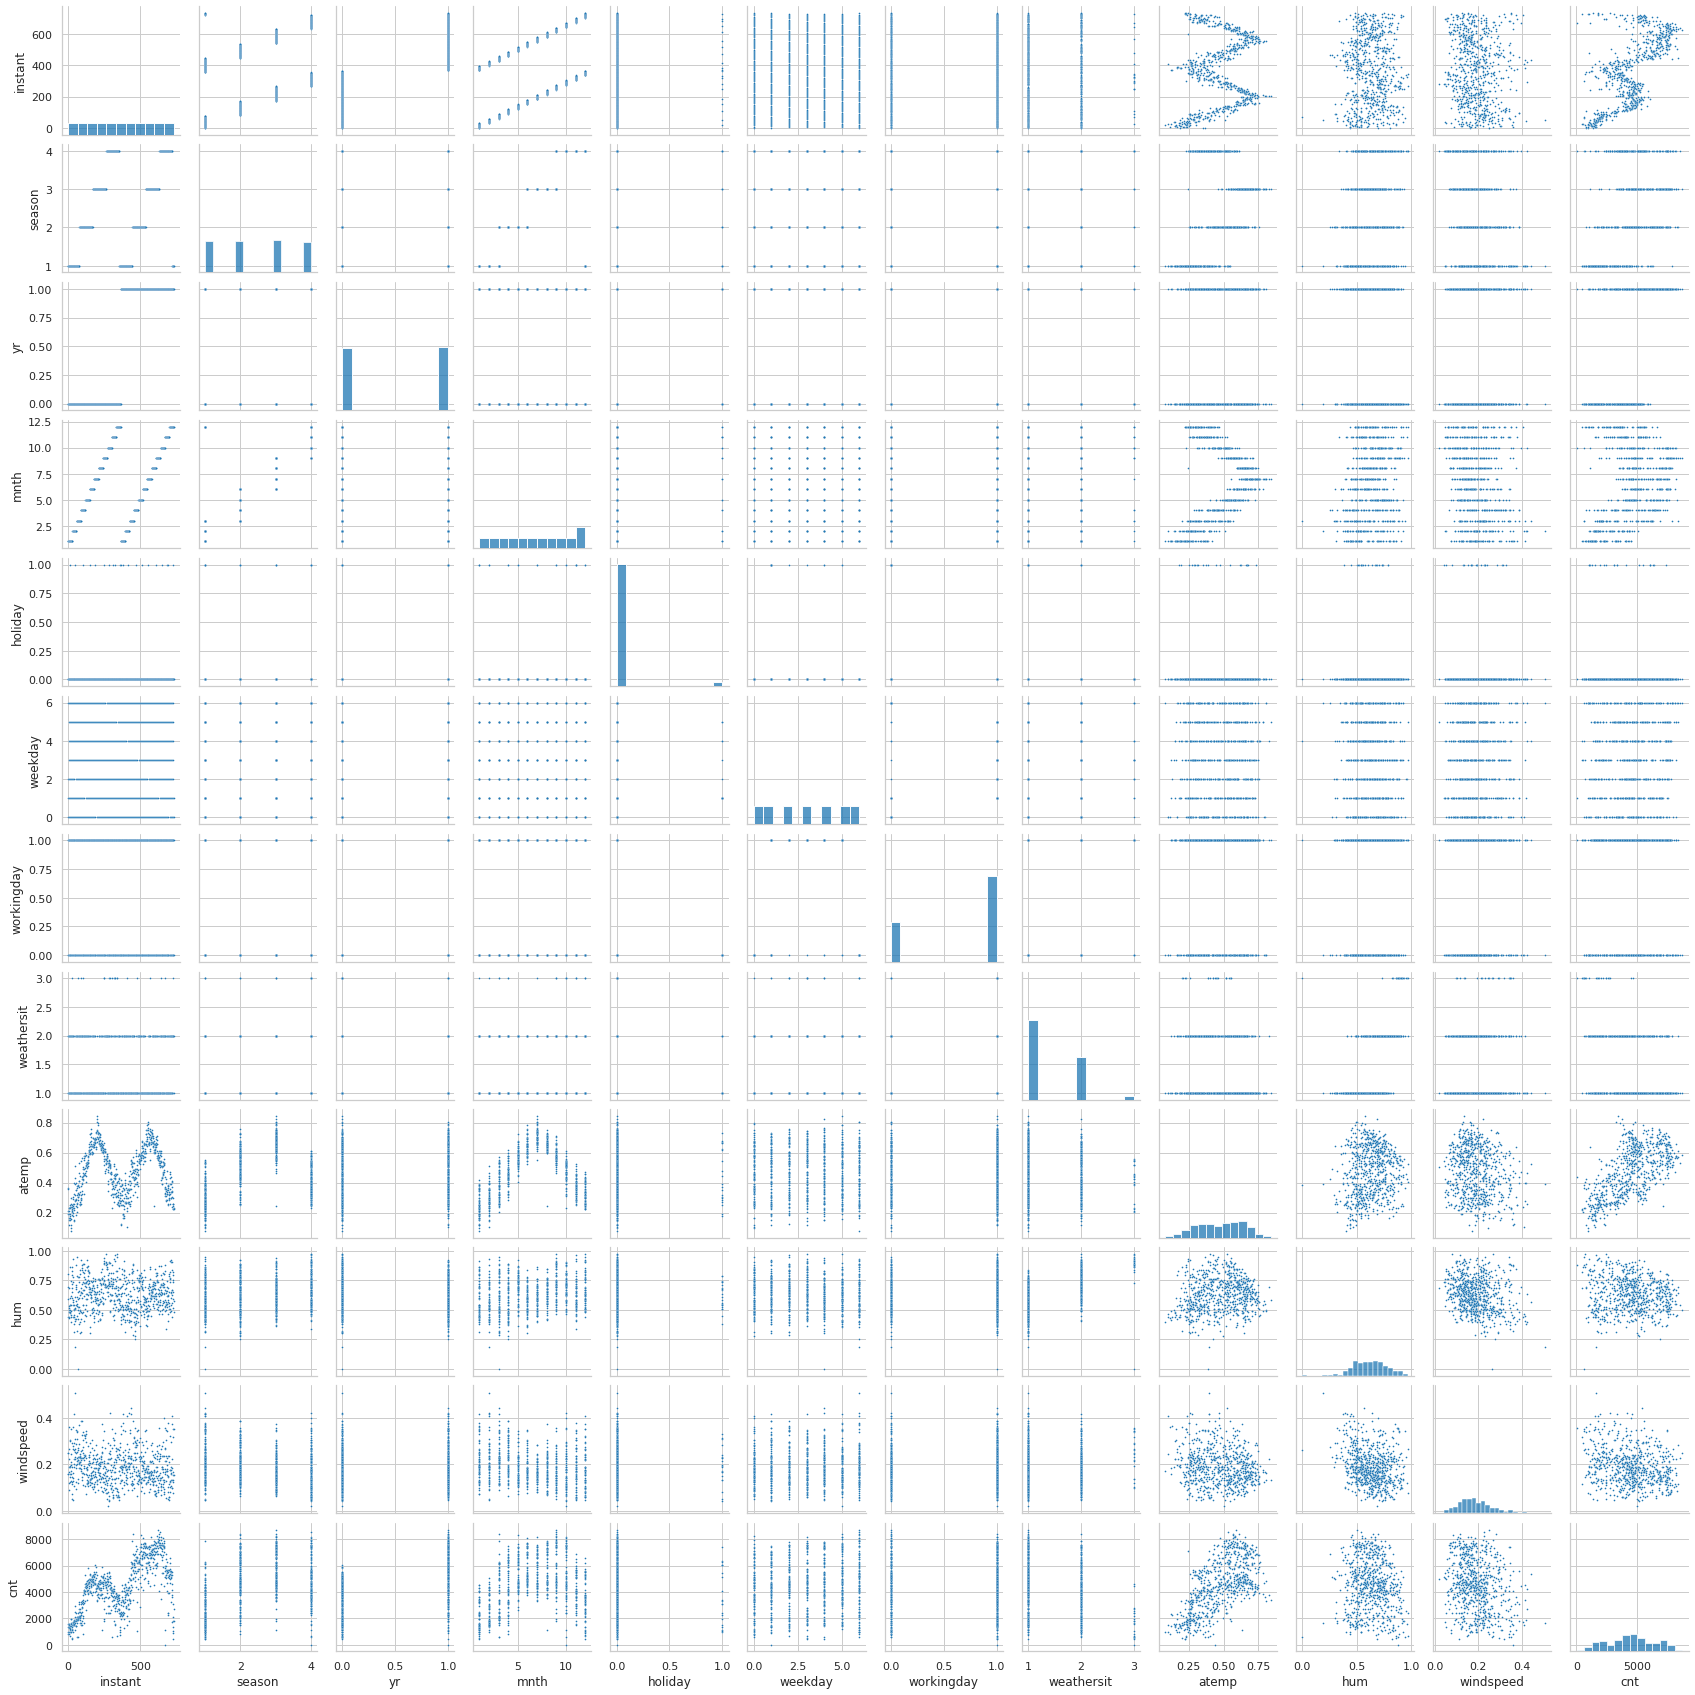

In [26]:
relacio = sns.pairplot(days_dataset, height=2, aspect=1, plot_kws={"s": 3})

Es pot apreciar una certa relació entre ``instant`` i ``cnt``, també una mica amb ``atemp`` i fins i tot amb ``mnth`` i ``windspeed``. S'hauria de comprovar si ``weathersit`` i ``hum`` podrien ajudar al model o només estorbarien.

Així doncs ara podreu respondre a les següents preguntes:

**1. Quin és el tipus de cada atribut?**

**2. Quins atributs tenen una distribució Guassiana?**

Els atributs 'temp' i 'atemp' són els més propers a tenir una forma gaussiana.

**3. Quin és l'atribut objectiu? Per què?**

Com hem dit abans 'cnt' és l'atribut objectiu.

# Apartat (B): Primeres regressions

Per a aquest primer apartat es calcularà l'error quadràtic mitjà només del regressor per a cada un dels atributs de la base de dades, determinant aquell atribut pel qual l'error quadràtic mitjà (entre el valor predit i el real, per a cada mostra) és més baix. 

A continuació, es modificaran tots els atributs mitjançant **procediments de normalització (normal, estàndard)**, i s'avaluarà el rendiment del regressor après. Per a això, caldrà analitzar la mitja i variança de cada variable per totes les mostres, per identificar aquells valors que tenen una distribució normal, els preferits per fer regressió, i descartar altres atributs que no són representatius per fer la regressió, i que afegeixen soroll al model. 

Pel que fa a l'error resultant de la regressió, es pot calcular fent la diferència entre el valor predit i el real al quadrat: així doncs, si les dades tenen valors grans (tipus 10^3), l'error al quadrat podria acabar sent 10^6. Per això és important normalitzar abans (escalar les dades a un rang més petit).

Anem a definir les noves dades normalitzades:

In [27]:
x_days = days_dataset.values[:, :-1]
y_days = days_dataset.values[:, -1]

In [28]:
X = (x_days - x_days.mean())/x_days.std()
y = (y_days - y_days.mean())/y_days.std()

#X = StandardScaler().fit_transform(x_days, y_days)
#y = y_days

Ara aprendrem un model regressor tenint en compte tots aquells atributs que tenen una millor distribució de valors i calcularem l'error assolit en la predicció.

In [29]:
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

Mean squeared error:  0.6045724887544274
R2 score:  0.3954275112455725


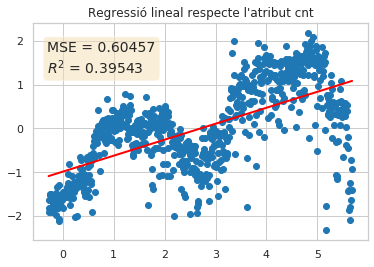

In [30]:
# Provem amb un únic atribut
atribut1 = X[:,0].reshape(X.shape[0], 1)

regressor = LinearRegression()
regressor.fit(atribut1, y)
predicted = regressor.predict(atribut1)

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

textstr = "MSE = {:.5f}\n$R^2$ = {:.5f}".format(MSE, r2)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(X[:,0], y)
plt.text(-0.3, 2, textstr, fontsize=14,
        verticalalignment='top', bbox=props)
plt.title("Regressió lineal respecte l'atribut cnt")
plt.plot(atribut1, predicted, 'r')
#plt.savefig('Imatges/model_regr_lineal.png', dpi=300, bbox_inches='tight')

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)


Sabent això ara podem avaluar de manera independent la idonietat de cadascun dels atributs.

Per a assegurar-nos que el model s'ajusta be a dades noves, no vistes, 
cal evaluar-lo en un conjunt de validacio (i un altre de test en situacions reals).
Com que en aquest cas no en tenim, el generarem separant les dades en 
un 80% d'entrenament i un 20% de validació.

In [31]:
# Dividim dades d'entrenament
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
for i in range(X_train.shape[1]):
    x_t = X_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = X_test[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))
    
    regressor = LinearRegression()
    regressor.fit(x_t, y_train)

    error = mse(y_test, regressor.predict(x_v)) # calculem error
    r2 = r2_score(y_test, regressor.predict(x_v))

    print("Error en  %s: %f" %(days_dataset.columns[i], error))
    print("R2 score en %s: %f" %(days_dataset.columns[i], r2))

Error en  instant: 0.644038
R2 score en instant: 0.443607
Error en  season: 0.922826
R2 score en season: 0.202759
Error en  yr: 0.735006
R2 score en yr: 0.365019
Error en  mnth: 1.052577
R2 score en mnth: 0.090665
Error en  holiday: 1.163613
R2 score en holiday: -0.005260
Error en  weekday: 1.160570
R2 score en weekday: -0.002632
Error en  workingday: 1.158827
R2 score en workingday: -0.001125
Error en  weathersit: 1.068909
R2 score en weathersit: 0.076556
Error en  atemp: 0.671596
R2 score en atemp: 0.419799
Error en  hum: 1.153117
R2 score en hum: 0.003808
Error en  windspeed: 1.066060
R2 score en windspeed: 0.079017


### Regressor lineal

Evaluem ara 3 regressors lineals i els compararem. Després mirarem si els podem millor d'alguna manera i així aconseguir millors resultats.

Provem primer un regressor lineal clàssic, així entenem quin és el punt des del que partim. 

In [33]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train) 
print ('\nCoefs (per dim) ', regressor.coef_, ' and intercept: ', regressor.intercept_)
# Best possible score is 1.0, lower values (even negatives!!) are worse.
print ('\nTraining Score:', regressor.score(X_train, y_train) )
print ('Testing Score:', regressor.score(X_test, y_test) )
print ('\nTraining MSE: ', mse(regressor.predict(X_train), y_train))
print ('Testing MSE: ', mse(regressor.predict(X_test), y_test))


Coefs (per dim)  [  -0.69585253   30.42425417  381.22481237   19.39037072  -18.02958696
    4.42890328    7.30016535  -40.82058233  367.62610883  -60.81442607
 -148.71382032]  and intercept:  151.62783683601964

Training Score: 0.7916032864970031
Testing Score: 0.8261913243427761

Training MSE:  0.19973369357133336
Testing MSE:  0.20118776700939983


### Regressor Lasso

Provem ara amb el model Lasso utilitzant la funció LassoCV que implementa un CrossValidation per poder provar diferents valors de alpha i que el model esculli quina és la millor. Ara bé, s'ha de tenir en compte que quan alpha tendeix a 0, el model tendeix a un regressor lineal com el que acabem de provar. Així que tot i que sembla que la millor alpha podria ser encara menor (ha escollit el valor més baix de la llista de possibilitats que li hem passat), no ho intentarem per poder estudiar diferents models, tot i que no siguin tan bons.

In [34]:
# Create a Lasso regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor_lasso = linear_model.LassoCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10])
regressor_lasso.fit(X_train, y_train) 
print('Alpha: ', regressor_lasso.alpha_)
print ('Coeffs (per dim): ', regressor_lasso.coef_, 'and intercept:', regressor_lasso.intercept_)
#print (feature_names)
# Are the coeficients now sparse?
print ('\nTraining Score:', regressor_lasso.score(X_train, y_train)) 
print ('Testing Score:', regressor_lasso.score(X_test, y_test)) 
print ('\nTraining MSE: ', mse(regressor_lasso.predict(X_train), y_train))
print ('Testing MSE: ', mse(regressor_lasso.predict(X_test), y_test))


Alpha:  0.0001
Coeffs (per dim):  [  0.35923865  31.9107295    0.         -13.28695356  -0.
   4.92303109   7.74282421 -48.77026991 328.45179565  -0.
  -0.        ] and intercept: 86.28852199773382

Training Score: 0.7834341678806447
Testing Score: 0.7738545166649364

Training MSE:  0.21925102705363417
Testing MSE:  0.21262118211884792


### Regressor Ridge

Provem ara amb el model Ridge utilitzant la funció RidgeCV, amb les mateixes precaucions que acabem d'explicar pel regressor Lasso.

In [35]:
# Create a Ridge regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor_ridge = linear_model.RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10])
regressor_ridge.fit(X_train, y_train)
print('Alpha: ', regressor_ridge.alpha_)
print ('Coeffs (per dim): ', regressor_ridge.coef_, 'and intercept:', regressor_ridge.intercept_)
#print (feature_names)
# Are the coeficients now sparse?
print ('\nTraining Score:', regressor_ridge.score(X_train, y_train)) 
print ('Testing Score:', regressor_ridge.score(X_test, y_test)) 
print ('\nTraining MSE: ', mse(regressor_ridge.predict(X_train), y_train))
print ('Testing MSE: ', mse(regressor_ridge.predict(X_test), y_test))


Alpha:  0.0001
Coeffs (per dim):  [ 1.88985825e-01  3.01095295e+01  6.30822458e+01 -7.26084207e+00
 -1.96514899e+01  4.26908589e+00  1.19406046e+01 -4.53250198e+01
  3.28602581e+02 -4.11206292e+01 -1.17481508e+02] and intercept: 57.149840976355804

Training Score: 0.8013508978863959
Testing Score: 0.7647116152488849

Training MSE:  0.19865198847910379
Testing MSE:  0.23461541410393508


Ara que tenim una primera aproximació a alguns models lineals, podríem veure quins atributs son els que realment han utilitzat per la regressió i utilitzar només aquests, per tal de simplificar el model. Veiem doncs, en ordre d'importància, els atributs que cada model ha considerat importants.

In [36]:
feature_names = days_dataset.columns[:-1]

In [37]:
ind = np.argsort(np.abs(regressor.coef_))
print ('Ordre de les variables (de menys a més important segons el primer regressor):', list(feature_names[ind]))

Ordre de les variables (de menys a més important segons el primer regressor): ['instant', 'weekday', 'workingday', 'holiday', 'mnth', 'season', 'weathersit', 'hum', 'windspeed', 'atemp', 'yr']


In [38]:
ind = np.argsort(np.abs(regressor_lasso.coef_))
print ('Ordre de les variables (de menys a més important segons el regressor lasso):', list(feature_names[ind]))

Ordre de les variables (de menys a més important segons el regressor lasso): ['yr', 'holiday', 'hum', 'windspeed', 'instant', 'weekday', 'workingday', 'mnth', 'season', 'weathersit', 'atemp']


In [39]:
ind = np.argsort(np.abs(regressor_ridge.coef_))
print ('Ordre de les variables (de menys a més important segons el regressor ridge):', list(feature_names[ind]))

Ordre de les variables (de menys a més important segons el regressor ridge): ['instant', 'weekday', 'mnth', 'workingday', 'holiday', 'season', 'hum', 'weathersit', 'yr', 'windspeed', 'atemp']


El regressor lineal i el ridge consideren importants, aproximadament, els mateixos atributs (tots dos tenen ``instant`` i ``weekday`` a les primeres posicions), però el lasso és força diferent (``instant`` a la útlima posició).

Podríem escollir els més importants basant-nos en aquests regressors, fent com una mena de mitjana, però sklearn ja ho fa per nosaltres amb la funció SelectKBest. Ara bé, no sabem quin nombre d'atributs hauria de ser, per això hem creat la funció ``find_best_k()``. El criteri de selecció de la k es basa en maximitzar el test score, però hi hem aplicat també una penalització per cada atribut extra que incorpori al model, és a dir, castiguem la complexitat del model.

In [40]:
def find_best_k(model, X, y, feature_names, max_k = 11, times=100, lamb=0.1):
    train_scores = np.zeros(max_k)
    test_scores = np.zeros(max_k)
    best_k = 0
    best_score = 0    
    
    for k in range(1, max_k):
        for i in range(times):
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(X, y)

            # Find best features
            selector = SelectKBest(score_func = f_regression, k = k)
            selector.fit_transform(X_train, y_train)
            indices = selector.get_support()
            df_feature_names = feature_names[indices]
            X_train_bf = X_train[:, indices]
            X_test_bf = X_test[:, indices]

            # Fit model
            model.fit(X_train_bf, y_train)
            predicted = model.predict(X_train_bf)

            # Save scores
            train_scores[k] += (model.score(X_train_bf, y_train)) - lamb*(k/(max_k))**2 
            test_scores[k] += (model.score(X_test_bf, y_test)) - lamb*(k/(max_k))**2

        train_scores[k] /= times
        test_scores[k] /= times
        
        if test_scores[k] > best_score:
            best_k = k
            best_score = test_scores[k]
    
    return train_scores, test_scores, best_k

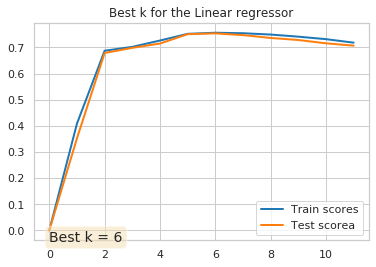

In [41]:
training_scores, test_scores, best_k_linear = find_best_k(LinearRegression(), X, y, feature_names, 12, times=100,)

plt.plot(training_scores, label='Train scores')
plt.plot(test_scores, label='Test scorea')
plt.legend()

textstr = "Best k = {}".format(best_k_linear)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.text(0, 0, textstr, fontsize=14,
        verticalalignment='top', bbox=props)
plt.title("Best k for the Linear regressor")
#plt.savefig('Imatges/best_k_linear.png', dpi=300, bbox_inches='tight')
plt.show()

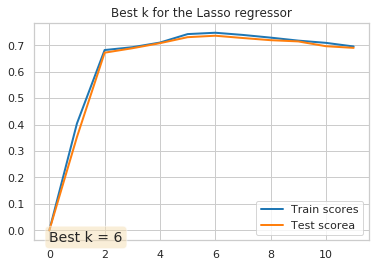

In [42]:
training_scores, test_scores, best_k_lasso = find_best_k(Lasso(alpha=0.0001), X, y, feature_names, 12, times=100)

plt.plot(training_scores, label='Train scores')
plt.plot(test_scores, label='Test scorea')
plt.legend()

textstr = "Best k = {}".format(best_k_lasso)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.text(0, 0, textstr, fontsize=14,
        verticalalignment='top', bbox=props)
plt.title("Best k for the Lasso regressor")
#plt.savefig('Imatges/best_k_lasso.png', dpi=300, bbox_inches='tight')
plt.show()

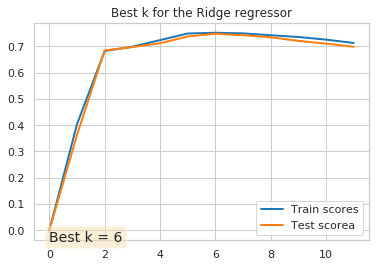

In [43]:
training_scores, test_scores, best_k_ridge = find_best_k(Ridge(alpha=0.0001), X, y, feature_names, 12, times=100)

plt.plot(training_scores, label='Train scores')
plt.plot(test_scores, label='Test scorea')
plt.legend()

textstr = "Best k = {}".format(best_k_ridge)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.text(0, 0, textstr, fontsize=14,
        verticalalignment='top', bbox=props)
plt.title("Best k for the Ridge regressor")
#plt.savefig('Imatges/best_k_ridge.png', dpi=300, bbox_inches='tight')
plt.show()

In [44]:
best_k = best_k_linear

Sembla que la millor k en els 3 casos és 6, tot i que no tenia per què ser-ho. Això simplifica una mica la feina, ja que només tractarem amb una k.

In [45]:
selector = SelectKBest(f_regression, k = best_k)
selector.fit_transform(X_train, y_train)
indices = selector.get_support()
best_features = feature_names[indices]
print ('Atributs seleccionats (T/F):', indices, '\nAtributs seleccionats  (Name):', list(best_features)) # Show the selected features

Atributs seleccionats (T/F): [ True  True  True  True False False False  True  True False False] 
Atributs seleccionats  (Name): ['instant', 'season', 'yr', 'mnth', 'weathersit', 'atemp']


In [46]:
X_bf = X[:, indices]
X_train_bf, X_test_bf = X_train[:, indices], X_test[:, indices]

Un altre mètode per simplificar el model que se sol utilitzar és el PCA. El provarem i comprovarem si el millor és utilitzar tots els components, només els que hem considerat més importants, o potser transformar-los amb un PCA.

Pel PCA també hem de mirar quin és el millor nombre de components en el qual volem transformar la X.

In [47]:
param_grid = {'pca__n_components': list(range(15))}
pipe = Pipeline(steps=[("pca", PCA()), ("LinearRegression", LinearRegression())])

grid = GridSearchCV(pipe, param_grid, refit = True,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X, y) 

# print best parameter after tuning 
n_components_linear = grid.best_params_['pca__n_components']
print(n_components_linear)

8


In [48]:
param_grid = {'pca__n_components': list(range(15))}
pipe = Pipeline(steps=[("pca", PCA()), ("Lasso", Lasso(alpha=0.0001))])

grid = GridSearchCV(pipe, param_grid, refit = True,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X, y) 

# print best parameter after tuning 
n_components_lasso = grid.best_params_['pca__n_components']
print(n_components_lasso)

9


In [49]:
param_grid = {'pca__n_components': list(range(15))}
pipe = Pipeline(steps=[("pca", PCA()), ("Ridge", Ridge(alpha=0.0001))])

grid = GridSearchCV(pipe, param_grid, refit = True,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X, y) 

# print best parameter after tuning 
n_components_ridge = grid.best_params_['pca__n_components']
print(n_components_ridge)

11


En aquest cas no han coincidit cap dels 3, així que haurem de tenir 3 transformacions de les dades.

In [50]:
pca_linear = PCA(n_components_linear)
X_pca_linear = pca_linear.fit_transform(X)

In [51]:
pca_lasso = PCA(n_components_lasso)
X_pca_lasso = pca_lasso.fit_transform(X)

In [52]:
pca_ridge = PCA(n_components_ridge)
X_pca_ridge = pca_ridge.fit_transform(X)

#### All features

In [53]:
def model_visualization(model, X, y, title, save_plot=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    model.fit(X_train, y_train)
    f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    predicted = model.predict(X_test)
    
    training_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    textstr = AnchoredText("Training score={:.5f}\nTest score = {:.5f}".format(training_score, test_score), loc=2)
    
    ax1.scatter(y_test, predicted, alpha = 0.3)
    ax1.plot([y_test.min(), y_test.max()], [predicted.min(), predicted.max()], '--k')
    ax1.set_xlabel('True count')
    ax1.set_ylabel('Predicted count')
    ax1.add_artist(textstr)

    ax2.scatter(range(len(predicted)), y_test, alpha = 0.3, color='y')
    ax2.scatter(range(len(predicted)), predicted, alpha = 0.3, color='m')
    ax2.set_xlabel('True count')
    ax2.set_ylabel('Predicted count')
    
    if save_plot:
        plt.savefig('Imatges/{}.png'.format(title), dpi=300, bbox_inches='tight')
    
    print(str(model))
    print("Training score: ", training_score)  # Best possible score is 1.0, lower values are worse.
    print("Test score: ", test_score)

LinearRegression()
Training score:  0.7983347063681681
Test score:  0.8021687249279508


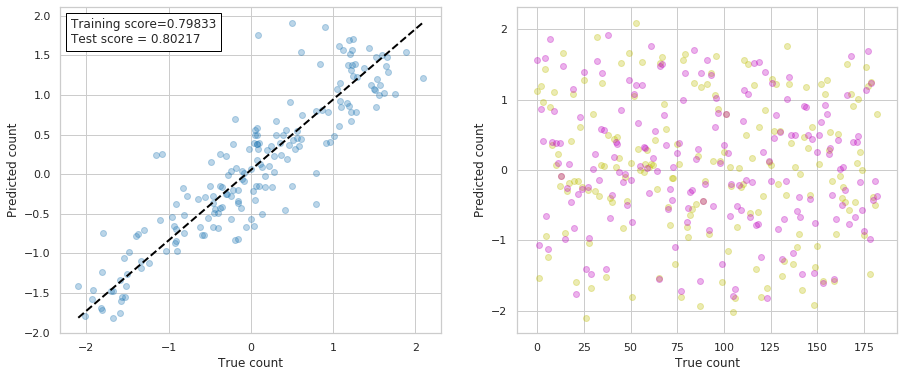

In [54]:
model_visualization(LinearRegression(), X, y, 'Linear_regression_all_features')

Lasso(alpha=0.0001)
Training score:  0.8006791149300841
Test score:  0.684583196238038


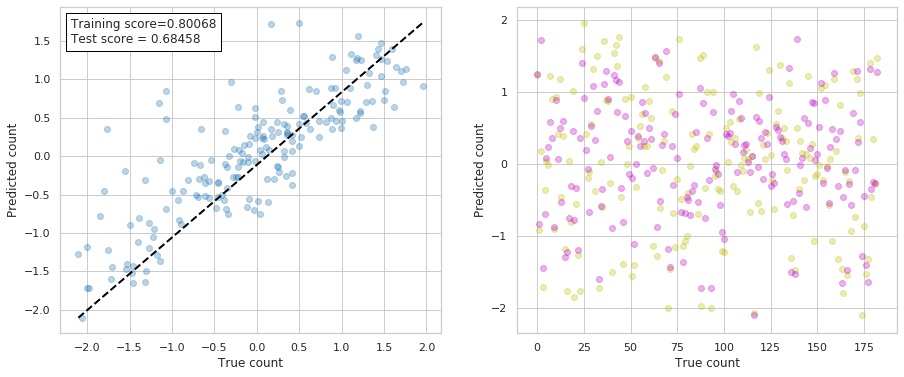

In [55]:
model_visualization(Lasso(alpha=0.0001), X, y, 'Lasso_regression_all_features')

Ridge(alpha=0.0001)
Training score:  0.7966028915588516
Test score:  0.7835707880144442


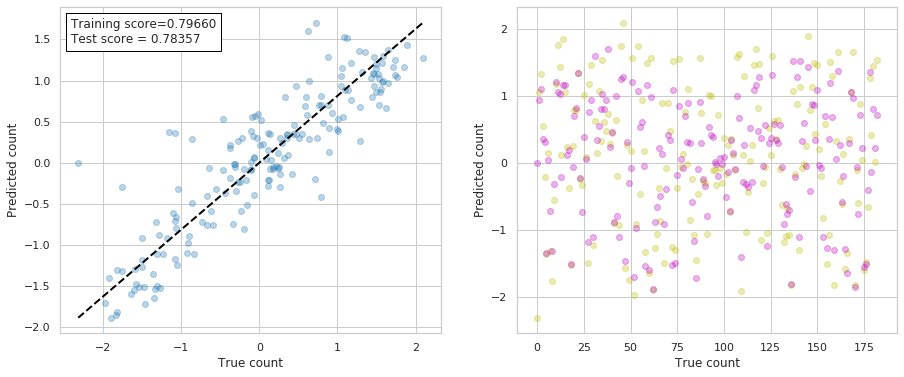

In [56]:
model_visualization(Ridge(alpha=0.0001), X, y, 'Ridge_regression_all_features')

LinearRegression()
Training score:  0.7900727412000619
Test score:  0.7586040003899128


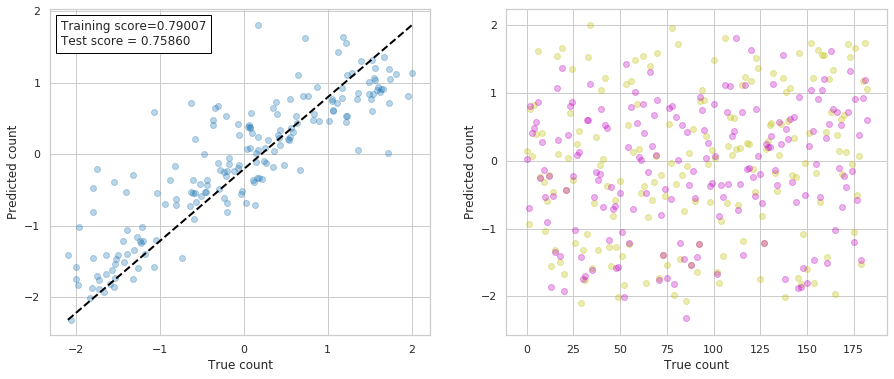

In [57]:
model_visualization(LinearRegression(), X_bf, y, 'Linear_regression_best_features')

Lasso(alpha=0.0001)
Training score:  0.7638420098003122
Test score:  0.7816075935452169


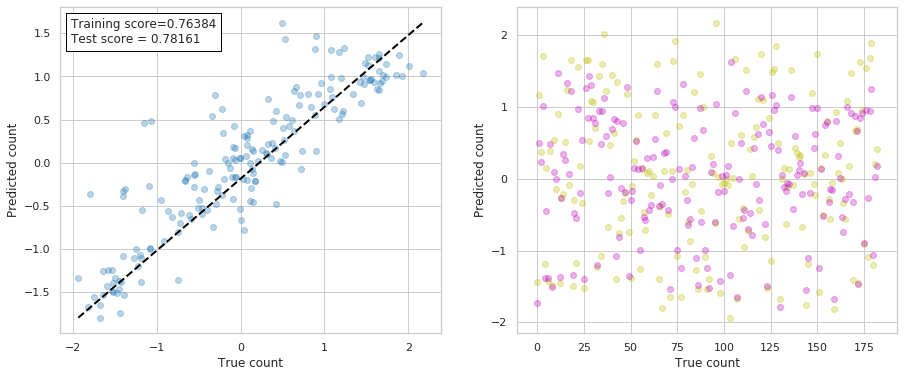

In [58]:
model_visualization(Lasso(alpha=0.0001), X_bf, y, 'Lasso_regression_best_features')

Ridge(alpha=0.0001)
Training score:  0.7736147163760433
Test score:  0.7826124067017638


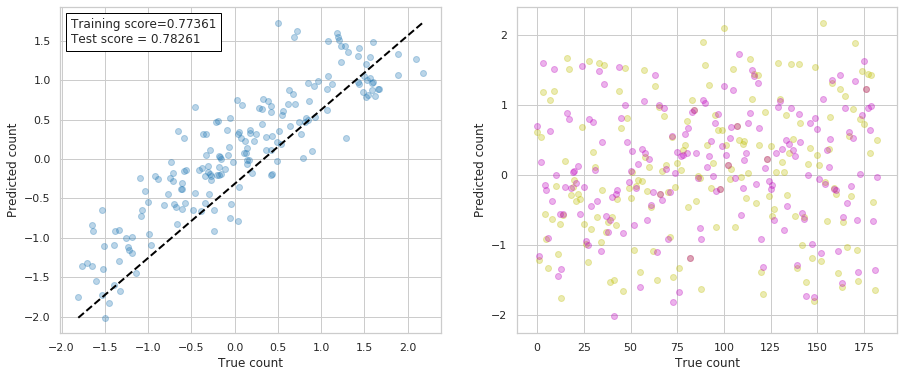

In [59]:
model_visualization(Ridge(alpha=0.0001), X_bf, y, 'Ridge_regression_best_features')

LinearRegression()
Training score:  0.7780465977308664
Test score:  0.7659793261096308


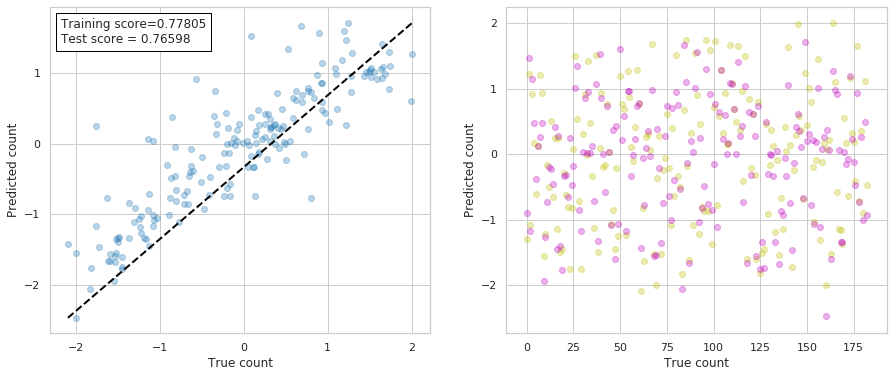

In [60]:
model_visualization(LinearRegression(), X_pca_linear, y, 'Linear_regression_PCA_features')

Lasso(alpha=0.0001)
Training score:  0.7698982093083242
Test score:  0.7601690244824765


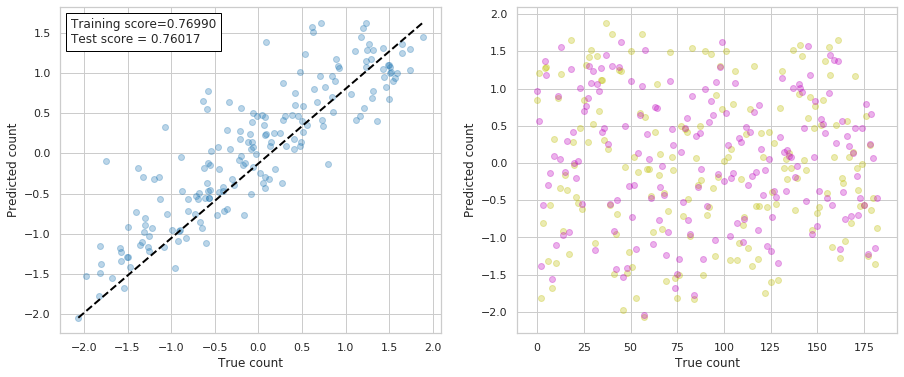

In [61]:
model_visualization(Lasso(alpha=0.0001), X_pca_lasso, y, 'Lasso_regression_PCA_features')

Ridge(alpha=0.0001)
Training score:  0.8033633608378012
Test score:  0.769483865260943


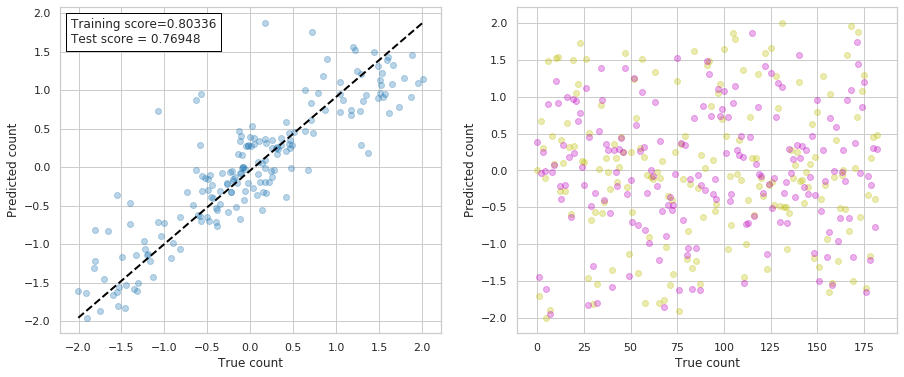

In [62]:
model_visualization(Ridge(alpha=0.0001), X_pca_ridge, y, 'Ridge_regression_PCA_features')

Tots els models donen valors bons (scores al voltant del 80%, tot i que normalment per sota d'aquest umbral), però sembla que el clàssic regressor lineal que utilitza els atributs importants és una mica millor a la resta.

### Regressor polinomial

Potser els regressors lineals no poden donar més de si, i el que necessita aquest problema és un regressor polinomial. Ara ho comprovarem.

No sabem quin és el grau que hauria de tenir aquest polinomi, així que hem creat una altra funció que prova els diferents valors fins trobar el grau adequat.

In [63]:
def find_best_degree(poly_model, X, y, max_degree=10, times=100):
    score = 0
    best_score = 0
    best_degree = 0
    
    for degree in range(1, max_degree):
        score = 0
        for i in range(times):
            X_train, X_test, y_train, y_test = train_test_split(X, y)

            model = Pipeline([('poly', PolynomialFeatures(degree = degree)),('linear', poly_model)])
            model = model.fit(X_train, y_train)
            
            score += model.score(X_test, y_test)
        
        score = score/times
        if score > best_score:
            best_degree = degree
            best_score = score
    
    print("Best degree: ", best_degree)
    print("Score: ", best_score)
    return best_degree

In [64]:
def show_polynomial_regression(X, y, degree, title, save_plot=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    degree = best_degree
    poly = PolynomialFeatures(degree = degree)
    poly.fit_transform(X_train)

    model = Pipeline([('poly', PolynomialFeatures(degree = degree)),('linear', LinearRegression(fit_intercept=False))])
    model = model.fit(X_train, y_train)
    
    model_visualization(model, X, y, title, save_plot)

In [65]:
best_degree = find_best_degree(LinearRegression(fit_intercept=False), X, y, 5, times=10)

Best degree:  2
Score:  0.8174165018301747


Pipeline(steps=[('poly', PolynomialFeatures()),
                ('linear', LinearRegression(fit_intercept=False))])
Training score:  0.9013100510206914
Test score:  0.8284536718607989


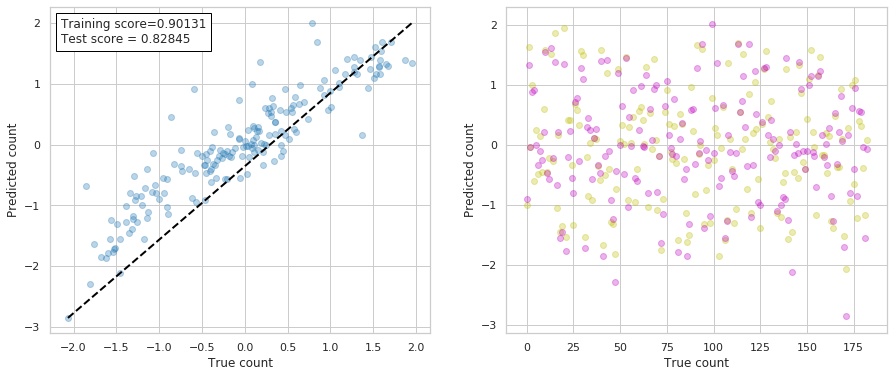

In [66]:
show_polynomial_regression(X, y, best_degree, 'Poly_regression_all_features')

Sense provar cap transformació de les dades (a part de la normalització inicial), aquest model sembla consistentment millor que els linears que hem estudiat abans. Amb la crossvalidation de la funcio ``find_best_degree`` ens surt un score dels voltants de 0.85, cosa que no havíem vist ni al linear, ni al lasso ni al ridge.

Per curiositat, voldríem provar ràpidament altres models que amb poques dades (menys de 1000), creiem que poden funcionar bé.

RandomForestRegressor()
Training score:  0.9833898385517865
Test score:  0.869370787930164


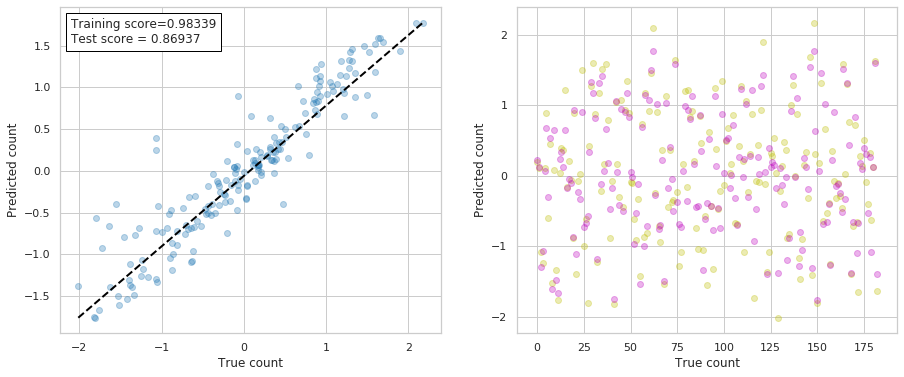

In [67]:
model = RandomForestRegressor()
model_visualization(model, X, y, 'RandomForest_regression_all_features')

DecisionTreeRegressor()
Training score:  1.0
Test score:  0.7111330122998465


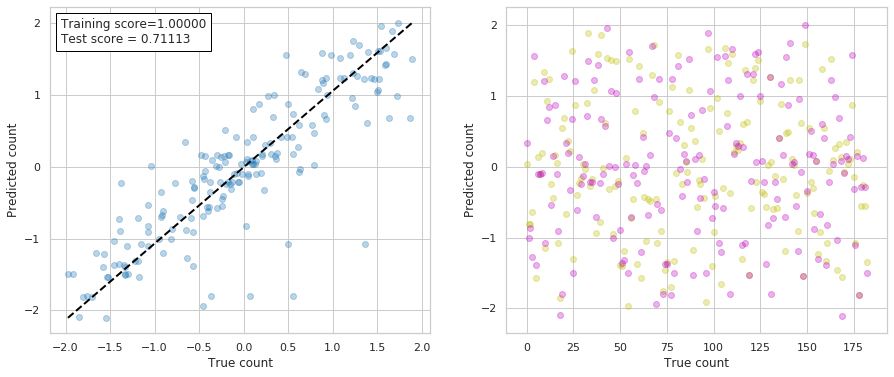

In [68]:
model = DecisionTreeRegressor()
model_visualization(model, X, y, 'DecisionTree_regression_all_features')

GradientBoostingRegressor()
Training score:  0.9678245454711192
Test score:  0.8856824804968293


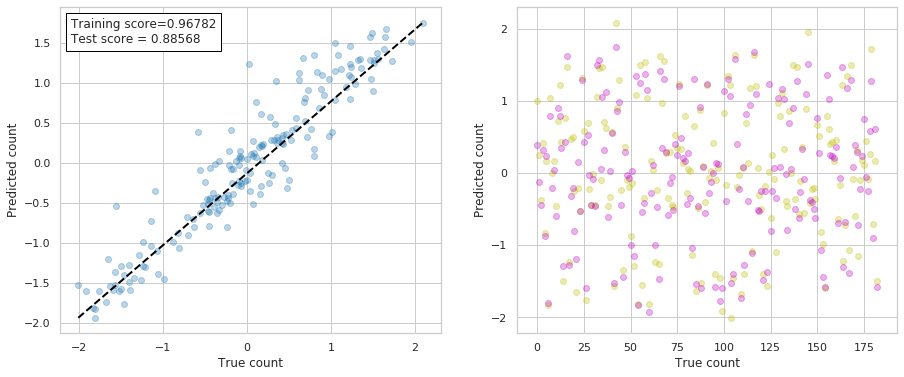

In [69]:
model = GradientBoostingRegressor()
model_visualization(model, X, y, 'GradientBoost_regression_all_features')

Aquests models alternatius tenen un training score altissim, i un test score també alt. Això pot indicar que amb alguns retocs, aquests models podrien tenir un test score de més de 0.9, però això s'allunya de l'objectiu de la pràctica.

Quan es treballa en dades n-dimensionals (més d'un atribut), una opció és reduir la seva n-dimensionalitat aplicant un Principal Component Analysis (PCA) i quedar-se amb els primers 2 o 3 components, obtenint unes dades que (ara sí) poden ser visualitzables en el nou espai. Existeixen altres embeddings de baixa dimensionalitat on poder visualitzar les dades?

Així es podrà contestar a aquestes **preguntes**:

1. Quin són els atributs més importants per fer una bona predicció?

2. Amb quin atribut s'assoleix un MSE menor?

3. Quina correlació hi ha entre els atributs de la vostra base de dades?

4. Com influeix la normalització en la regressió?

5. Com millora la regressió quan es filtren aquells atributs de les mostres que no contenen informació?

6. Si s'aplica un PCA, a quants components es redueix l'espai? Per què?


# Apartat (A): El descens del gradient  

En aquest apartat, ens centrarem en implementar en python el procés de descent del gradient explicat a les classes de teoria, i comparar-lo amb els resultats obtinguts amb l'apartat (B). 

$$J(w) = \frac{1}{2m} \left[ \sum^m_{i=1}(f(x^{i}; w) - y^{i})^2 + \lambda\sum_{j=1}^{n}(w_{j}^2) \right]$$

$J$ retorna el `mse`. Per a trobar $w_j$, repetirem fins convergència:
$$w_0 = w_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot 1$$
$$w_j = w_j - \alpha \left[\frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i} - \frac{\lambda}{m}w_{j} \right]$$


ó:

$$w_{j} := w_{j} \left(1-\alpha \frac{\lambda}{m} \right) - \alpha\frac{\lambda}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i}$$

On si considerem un regressor lineal (el model és una recta), llavors $w_0$ i $w_1$ representen, respectivament, la $b$ i $a$ de la fòrmula de la recta: 

$$h_\theta(x^{(i)}) = ax + b$$

$\alpha$ és el learning rate, i $h_\theta(x^{(i)})$ és la funció que fa la regressió, és a dir, la funció que prediu el valor de $y^{(i)}$ donat un(s) atribut(s) concret(s) $x^{(i)}$.

Així, tenint calculat el model en l'últim punt del primer exercici, ja sabem quin resultat hauríeu d'obtenir. O no, perquè la nostra implementació podria ser millor! 

In [70]:
class Regressor(object):
    def __init__(self, w, alpha, m, lambdaVal=2):
        # Inicialitzem les w_i
        self.w = w
        self.alpha = alpha
        self.m = m
        self.lambdaVal = lambdaVal
        
    def predict(self, x, y):
        # implementar aqui la funció de prediccio
        return np.dot(x,self.w)
    
    def aux_cost(self):
        aux = 0
        for wi in self.w:
            aux += self.lambdaVal * wi ** 2
        return aux
    
    def aux_loss(self, x, y, i):
        suma = 0
        for j in range(self.m):
            hy = self.predict(x[j], y)
            loss = hy - y[j]
            loss *= x[j][i]
            suma += loss
        return suma
    
    def __update(self, x, y):
        # actualitzar aqui els pesos donada la prediccio (hy) i la y real.
        for i in range(0,len(self.w)):
            self.w[i] -= self.alpha*((1/self.m) * self.aux_loss(x,y,i) - (self.lambdaVal*self.w[i] / self.m))
    
    def train(self, max_iter, epsilon, x, y):
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        iterat = 0
        while (iterat < max_iter):
            self.__update(x, y)
            if max([abs(self.alpha * wi) for wi in self.w]) < epsilon:
                break
            iterat += 1
        print(iterat)
        return self.w


In [71]:
# Definim dades per la regressió per descens del gradient
m, n = np.shape(X_train)
numIter = 1000
alpha = 0.005
epsilon = 1e-4
theta = np.ones(n)
regr = Regressor(theta, alpha, m)
theta = regr.train(numIter, epsilon, X_train, y_train)
theta

1000


array([0.54850654, 0.61968166, 0.59301812, 0.63072095, 0.59548452,
       0.63888774, 0.60552313, 0.60704436, 0.60476764, 0.60326943,
       0.59859854])

In [72]:
ind3 = np.argsort(np.abs(theta))
print (list(feature_names[ind3]))

['instant', 'yr', 'holiday', 'windspeed', 'hum', 'atemp', 'workingday', 'weathersit', 'season', 'mnth', 'weekday']


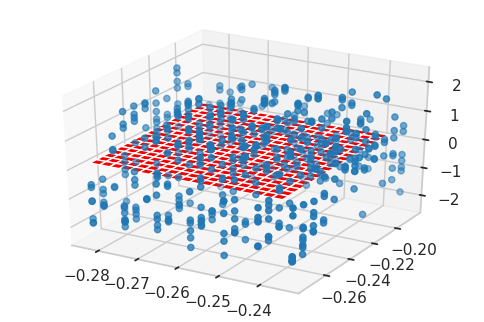

In [73]:
%matplotlib inline 
# %matplotlib notebook

# Creem figura 3d
from mpl_toolkits.mplot3d import axes3d, Axes3D
# generem dades 3D d'exemple
X_test_gd = X_train
y_test_gd = y_train
#regr = regression(X_test_gd, y_test_gd)
predX3D = regr.predict(X_test_gd, y_test_gd)

# Afegim els 1's
A = np.hstack((X_test_gd,np.ones([X_test_gd.shape[0],1])))
#w = np.linalg.lstsq(A,predX3D)[0]
w = theta

#Dibuixem
#1r creem una malla acoplada a la zona de punts per tal de representar el pla
malla = (range(20) + 0 * np.ones(20)) / 10 
malla_x1 =  malla * (max(X_test_gd[:,ind3[-1]]) - min(X_test_gd[:,ind3[-1]]))/2 + min(X_test_gd[:,ind3[-1]])
malla_x2 =  malla * (max(X_test_gd[:,ind3[-2]]) - min(X_test_gd[:,ind3[-2]]))/2 + min(X_test_gd[:,ind3[-2]])

#la funcio meshgrid ens aparella un de malla_x1 amb un de malla_x2, per atot
#element de mallax_1 i per a tot element de malla_x2.
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)

# Cal desnormalitzar les dades
def desnormalitzar(x, mean, std):
    return x * std + mean

#ara creem la superficies que es un pla
zplot = w[ind3[-1]] * xplot + w[ind3[-2]] * yplot + w[0]

#Dibuixem punts i superficie
plt3d = plt.figure('Coeficiente prismatico -- Relacio longitud desplacament 3D', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(X_test_gd[:,ind3[-1]],X_test_gd[:,ind3[-2]],y_test_gd)
#plt.savefig('Imatges/descens_gradient.png', dpi=300, bbox_inches='tight')
plt.show()

Així es podrà contestar a aquestes preguntes:

1. Com influeixen tots els paràmetres en el procés de descens? Quins valors de learning rate convergeixen més ràpid a la solució òptima? Com influeix la inicialització del model en el resultat final? 

2. Quines funcions polinomials (de diferent grau, de diferents combinacions d'atributs, ...) heu escollit per ser apreses amb el vostre descens del gradient? quina ha donat el millor resultat (en error i rapidesa en convergència)?

3. Utilitzeu el regularitzador en la fòrmula de funció de cost i descens del gradient i proveu polinomis de diferent grau. Com afecta el valor del regularitzador?

3. Quina diferència (quantitativa i qualitativa) hi ha entre el vostre regressor i el de la llibreria ?

4. Té sentit el model (polinomial) trobat quan es visualitza sobre les dades? 

5. Ajuda la visualització a identificar aquelles mostres per a les que el regressor obté els pitjors resultats de predicció? 
